# Technika regulacji - Projekt 3&4

**Autorzy:** Iwo Chwiszczuk 280043, Szymon Flis 280153

📅 **Data:** 8 czerwca 2025

## Przygotowanie potrzebnych bibliotek i narzędzi oraz wyliczenie stałych A, B i C

In [1]:
import sympy as sp
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
sp.init_printing()

y_k = sp.IndexedBase('y')
u_k = sp.IndexedBase('u')

A, B = 3, 3
C = A + B

impulse_input = lambda x=100, A=1: np.concatenate(([A], np.zeros(x-1)))
step_input = lambda x=100, A=1: np.ones(x) * A

## Zadanie 1

### Wyprowadzenie równań różnicowych z równań różniczkowych dla dwóch wybranych czasów próbkowania

#### Funkcja wyznaczająca równanie różnicowe, dla danego równania różniczkowego i czasu próbkowania

In [2]:
from sympy.abc import t
y_t = sp.Function('y')(t)
k = sp.symbols('k', integer=True)

def differential_to_difference(differential_eq, h):
    difference_eq = differential_eq.subs({
        sp.diff(y_t, t, t): (y_k[k] - 2*y_k[k-1] + y_k[k-2]) / h**2,
        sp.diff(y_t, t): (y_k[k] - y_k[k-1]) / h,
        y_t: y_k[k],
        t: h*k
    })

    return difference_eq

h1, h2 = 0.1, 0.5
eq1 = sp.Eq(sp.diff(y_t, t, t) + 3*sp.diff(y_t, t) + y_t, sp.sin(sp.Symbol('omega')*t))
eq2 = sp.Eq(sp.diff(y_t, t, t) + sp.diff(y_t, t) - 2*y_t, 0)
eq3 = sp.Eq(sp.diff(y_t, t, t) + 3*sp.diff(y_t, t) + y_t, t)

display(Markdown(f"#### **Obiekt I**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq1)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq1, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq1, h2))}$"))

display(Markdown(f"#### **Obiekt II**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq2)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq2, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq2, h2))}$"))

display(Markdown(f"#### **Obiekt III**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq3)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq3, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq3, h2))}$"))


#### **Obiekt I**

**Równanie różniczkowe:**<br>$y{\left(t \right)} + 3 \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = \sin{\left(\omega t \right)}$

**Równanie różnicowe dla h = 0.1:**<br>$- 230.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 131.0 {y}_{k} = \sin{\left(0.1 k \omega \right)}$

**Równanie różnicowe dla h = 0.5:**<br>$- 14.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 11.0 {y}_{k} = \sin{\left(0.5 k \omega \right)}$

#### **Obiekt II**

**Równanie różniczkowe:**<br>$- 2 y{\left(t \right)} + \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = 0$

**Równanie różnicowe dla h = 0.1:**<br>$- 210.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 108.0 {y}_{k} = 0$

**Równanie różnicowe dla h = 0.5:**<br>$- 10.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 4.0 {y}_{k} = 0$

#### **Obiekt III**

**Równanie różniczkowe:**<br>$y{\left(t \right)} + 3 \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = t$

**Równanie różnicowe dla h = 0.1:**<br>$- 230.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 131.0 {y}_{k} = 0.1 k$

**Równanie różnicowe dla h = 0.5:**<br>$- 14.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 11.0 {y}_{k} = 0.5 k$

### Symulacja odpowiedzi systemów opisanych równaniami różnicowymi

#### Funkcja symulująca odpowiedź układu o zadanym równaniu różnicowym na zadane pobudzenie

In [3]:
def simulate_discrete_system(difference_eq, initial_conditions, u_vals, u_name):
    steps = len(u_vals)
    y_vals = np.zeros(steps)
    
    for i in range(steps):
        to_sub = {u_k[k + n]: u_vals[i + n] if i + n >= 0 else 0 for n in range(-4, 1)}
        to_sub.update({y_k[k + n]: y_vals[i + n] if i + n >= 0 else 0 for n in range(-2, 1)})
        to_sub.update(initial_conditions)

        y_i = sp.solve(difference_eq, y_k[k])
        y_vals[i] = float(y_i[0].subs(to_sub))

    k_vals = np.arange(steps)
    plt.stem(k_vals, y_vals, linefmt='b-', markerfmt='bo', basefmt='r-', label='Odpowiedź y[k]')
    plt.stem(k_vals, u_vals, linefmt='g--', markerfmt='gx', basefmt='r-', label='Pobudzenie u[k]')
    plt.title(fr'Odpowiedź systemu dyskretnego ${sp.latex(difference_eq)}$ z warunkami początkowymi ${sp.latex(initial_conditions)}$ na {u_name}')
    plt.xlabel('k')
    plt.ylabel('Wartość')
    plt.grid(True)
    plt.legend()
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.show()

#### System I

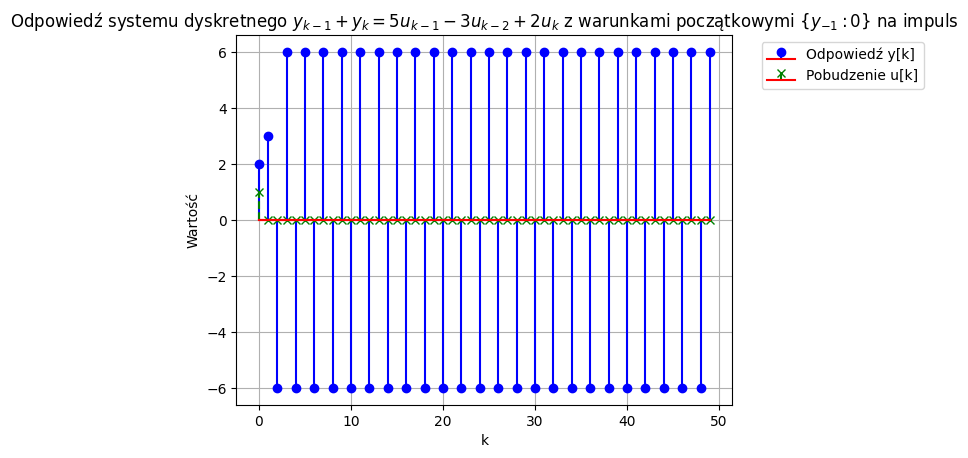

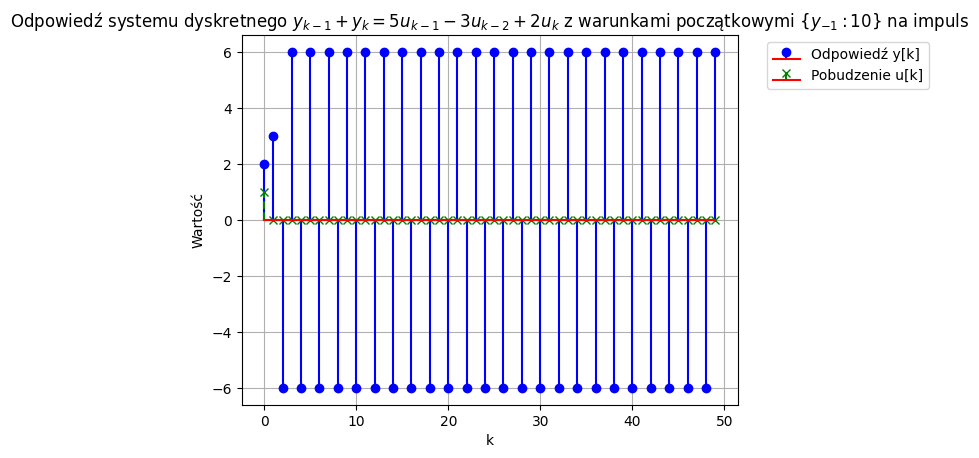

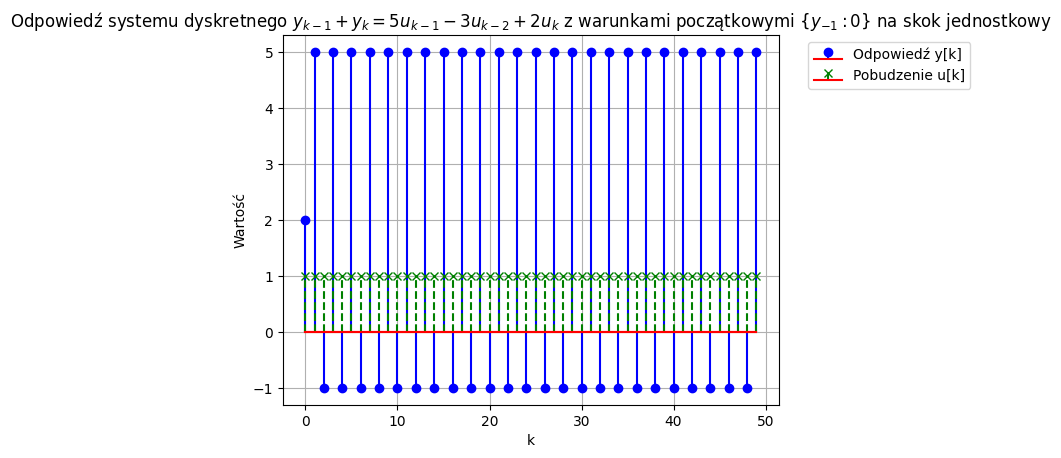

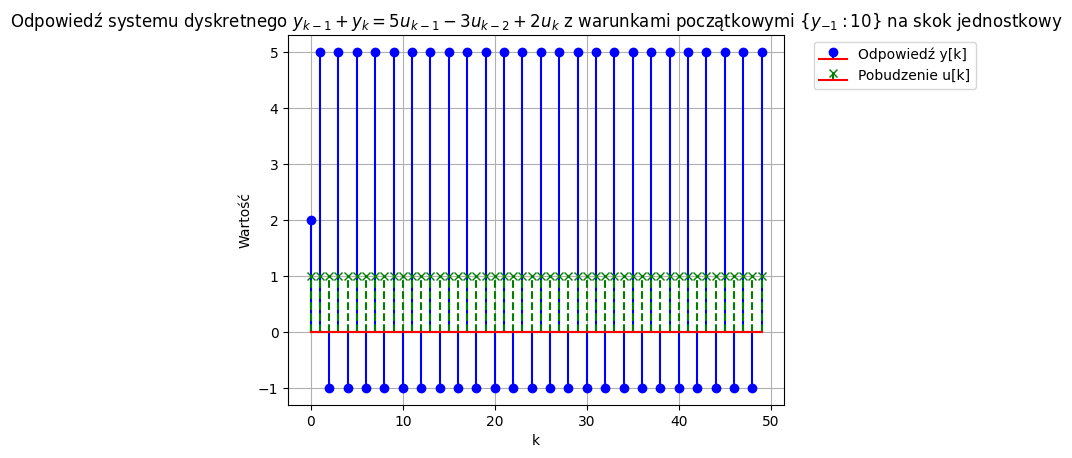

In [4]:
eq = sp.Eq(y_k[k-1] + y_k[k], 2*u_k[k] + 5*u_k[k-1] - 3*u_k[k-2])
ics1 = {y_k[-1]: 0}
ics2 = {y_k[-1]: 10}
simulate_discrete_system(eq, ics1, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics2, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics1, step_input(50), 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input(50), 'skok jednostkowy')

#### System II

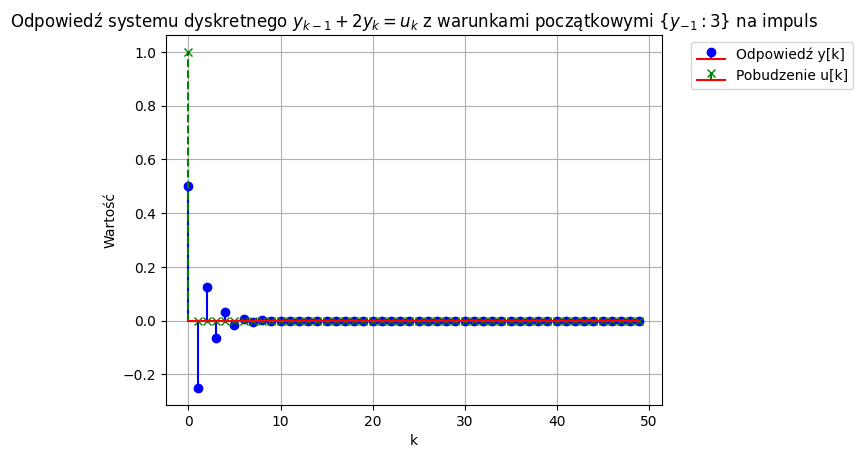

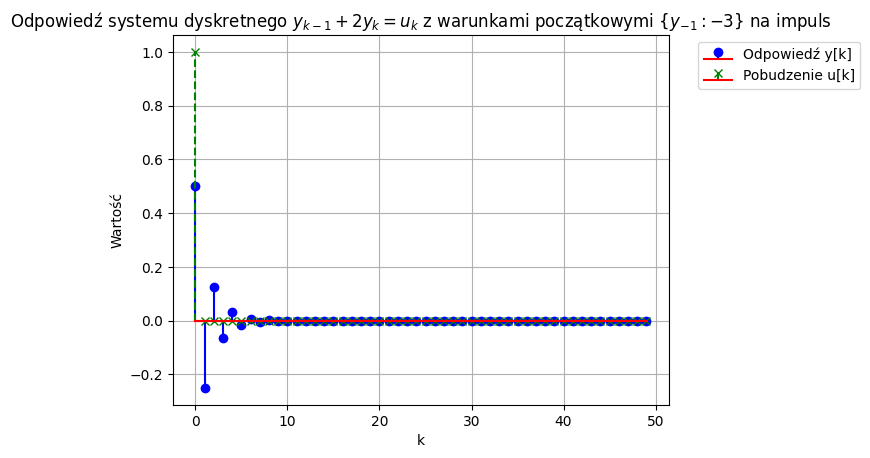

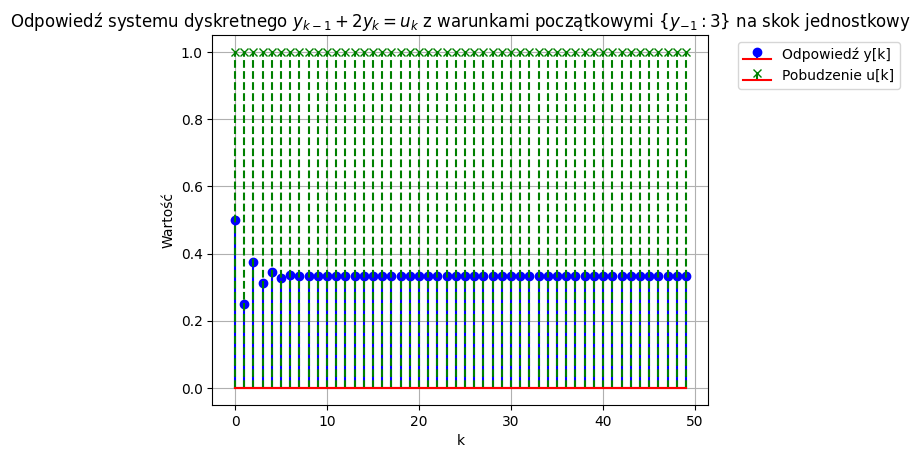

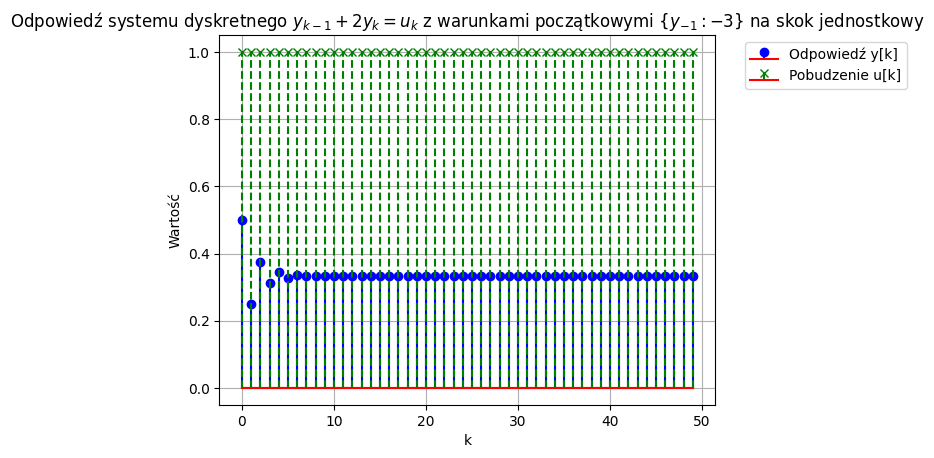

In [5]:
eq = sp.Eq(y_k[k-1] + 2*y_k[k], u_k[k])
ics1 = {y_k[-1]: 3}
ics2 = {y_k[-1]: -3}
simulate_discrete_system(eq, ics1, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics2, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics1, step_input(50), 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input(50), 'skok jednostkowy')


#### System III

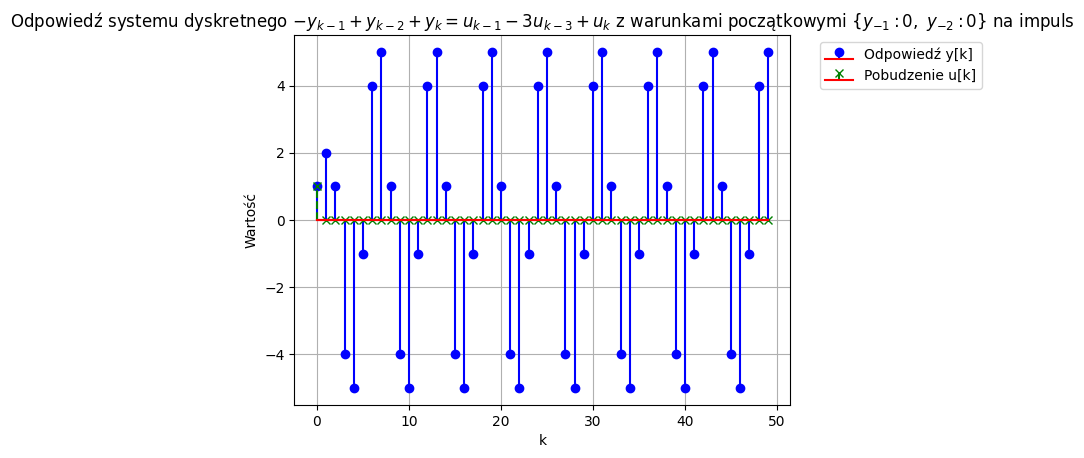

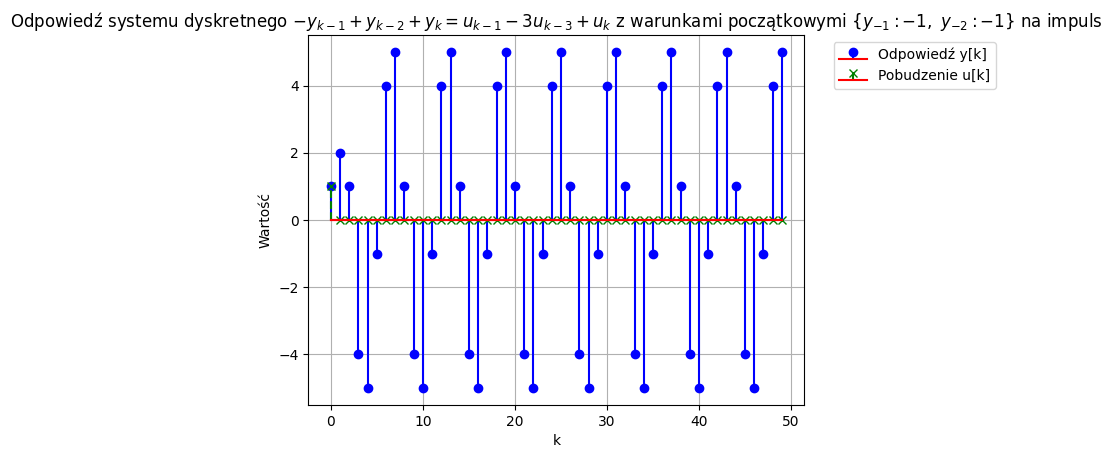

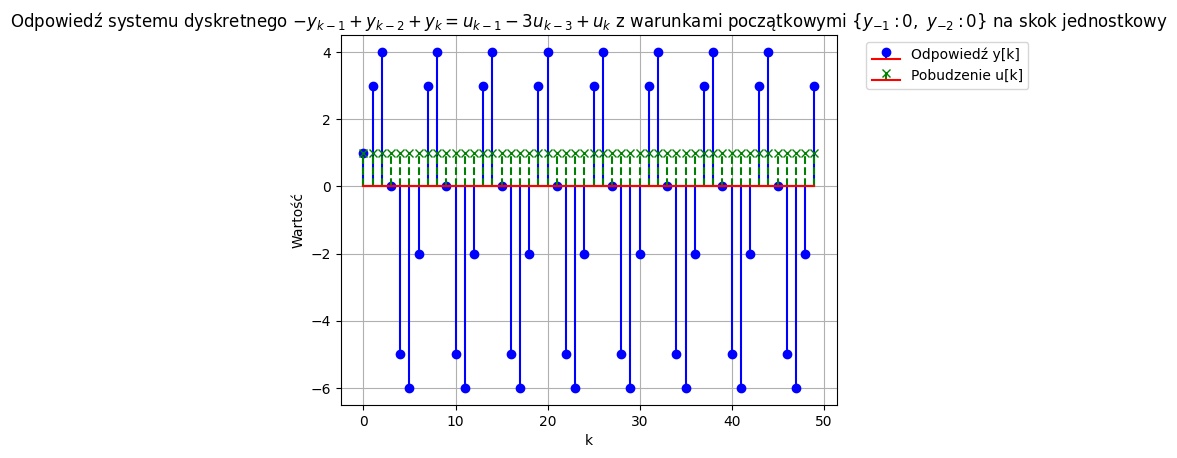

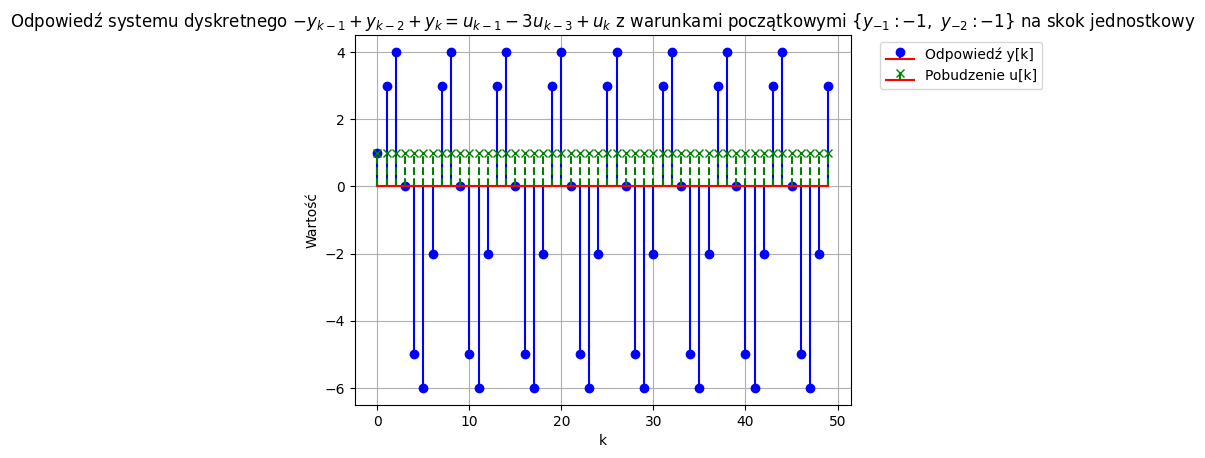

In [6]:
eq = sp.Eq(y_k[k-2] - y_k[k-1] + y_k[k], u_k[k] + u_k[k-1] - 3*u_k[k-3])
ics1 = {y_k[-1]: 0, y_k[-2]: 0}
ics2 = {y_k[-1]: -1, y_k[-2]: -1}
simulate_discrete_system(eq, ics1, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics2, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics1, step_input(50), 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input(50), 'skok jednostkowy')

### Transformata Z

In [7]:
import lcapy as lc
from lcapy import s, t
from lcapy.discretetime import k, z, n

T = sp.symbols('T', positive=True)

G1_s = C/((s+A)*(s+B)*(s-1))
display(Markdown(f"$$G_1(s) = {sp.latex(G1_s)}$$"))

c:\Users\iwoch\Documents\python_venvs\tr-projekt_python3_13\Lib\site-packages\lcapy\__init__.py:76: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


$$G_1(s) = \frac{6}{\left(s - 1\right) \left(s + 3\right)^{2}}$$

In [8]:
g1_kT = G1_s.inverse_laplace().subs({lc.Heaviside(t): 1, t: k*T}).args[0][0].simplify()
display(Markdown(f"$$g_1(kT) = {sp.latex(g1_kT)}$$"))
G1_z = lc.ZT(g1_kT, k, z)
display(Markdown(f"$$G_1(z) = {sp.latex(G1_z)}$$"))

$$g_1(kT) = \frac{3 \left(- 4 T k + e^{4 T k} - 1\right) e^{- 3 T k}}{8}$$

$$G_1(z) = - \frac{3 T z e^{3 T}}{2 \left(z e^{3 T} - 1\right)^{2}} - \frac{3 z e^{3 T}}{8 \left(z e^{3 T} - 1\right)} + \frac{3 z}{8 \left(z - e^{T}\right)}$$

### Odwrotna Transformata Z

In [9]:
izt_G1_z = lc.expr(G1_z).IZT().subs({n: k}).args[0][0].simplify()
display(Markdown(rf"$$Z^{{-1}}\{{G_1(z)\}} = {sp.latex(izt_G1_z)}$$"))

$$Z^{-1}\{G_1(z)\} = \frac{3 \left(- 4 T k + e^{4 T k} - 1\right) e^{- 3 T k}}{8}$$

### Wnioski
- Transformacja równań różniczkowych na różnicowe
    - Pokazano skuteczną metodę przejścia od równań różniczkowych (opisujących systemy ciągłe) do równań różnicowych (opisujących systemy dyskretne) dla różnych kroków czasowych h
    - Dla różnych obiektów otrzymano odpowiadające im równania różnicowe, co demonstruje uniwersalność metody
- Symulacja systemów dyskretnych
    - Zaimplementowana funkcja simulate_discrete_system pozwala na symulację odpowiedzi systemów dyskretnych na różne wymuszenia
    - Symulacje pokazują znaczący wpływ warunków początkowych na odpowiedź symulowanych systemów
    - Systemy wykazują różne zachowania w zależności od struktury równania różnicowego i warunków początkowych
- Transformata Z i Odwrotna Transformata Z
    - Wyznaczono Transformatę Z systemu na podstawie transmitancji ciągłej wykorzystując bibliotekę lcapy (która jest rozszerzeniem biblioteki sympy m.in. w zakresie działań w dziedzinie dyskretnej)
    - Wyznaczono Odwrotną Transformatę Z i potwierdzono jej poprawność porównując ją z oryginalną odpowiedzią impulsową w dziedzinie dyskretnej

## Zadanie 2

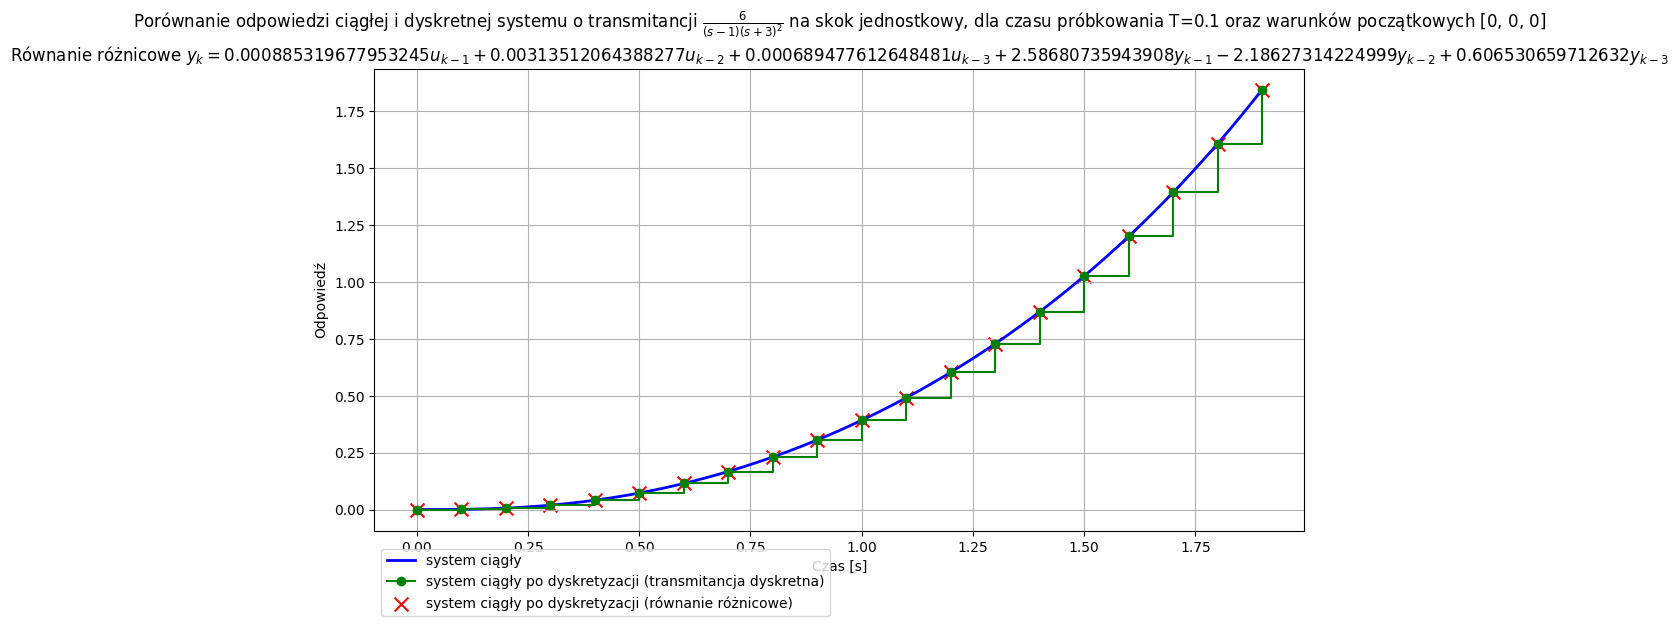

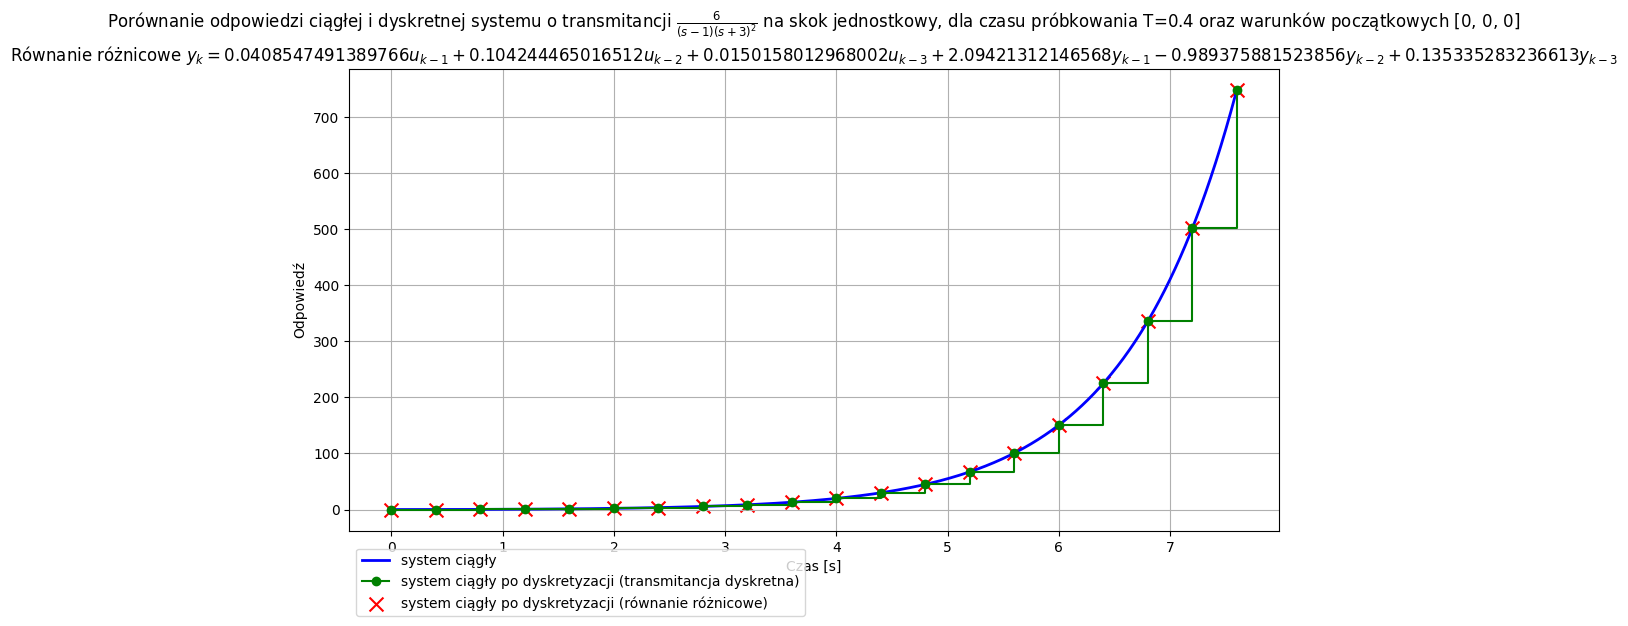

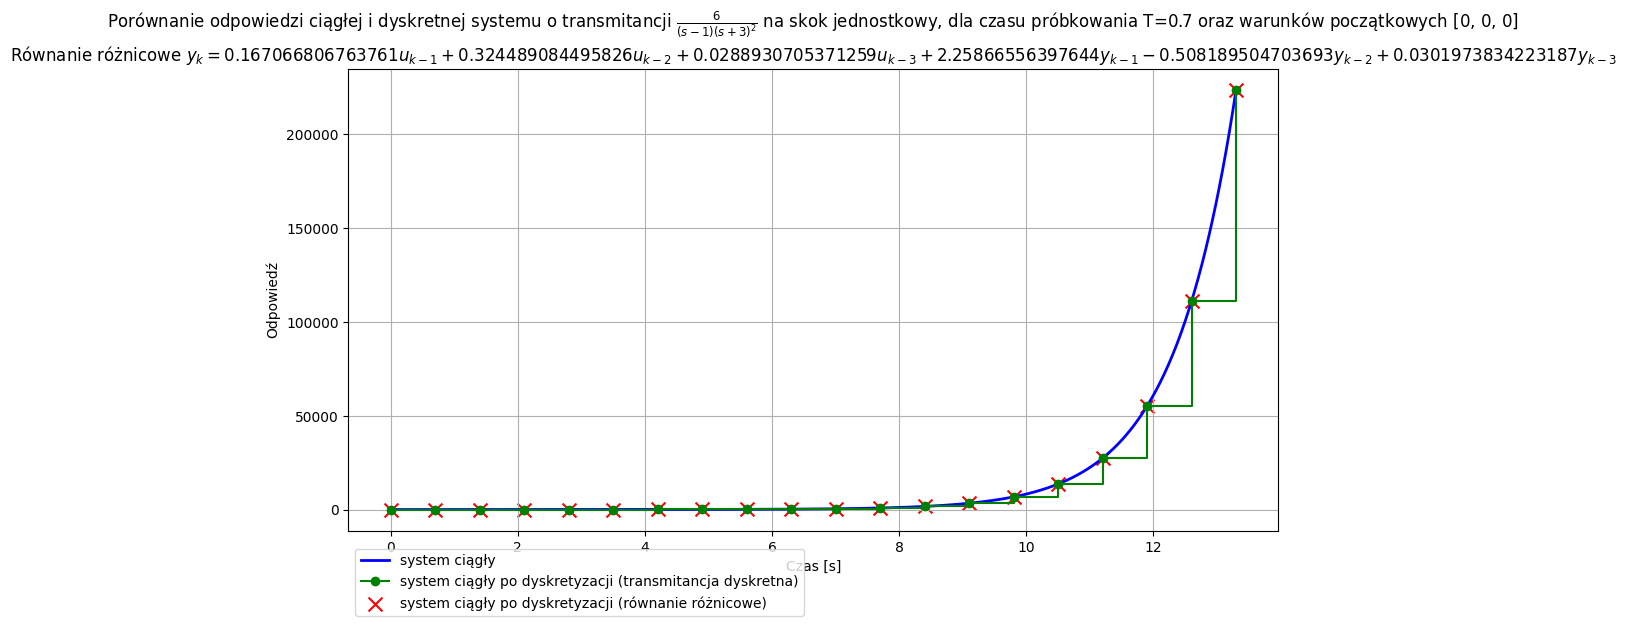

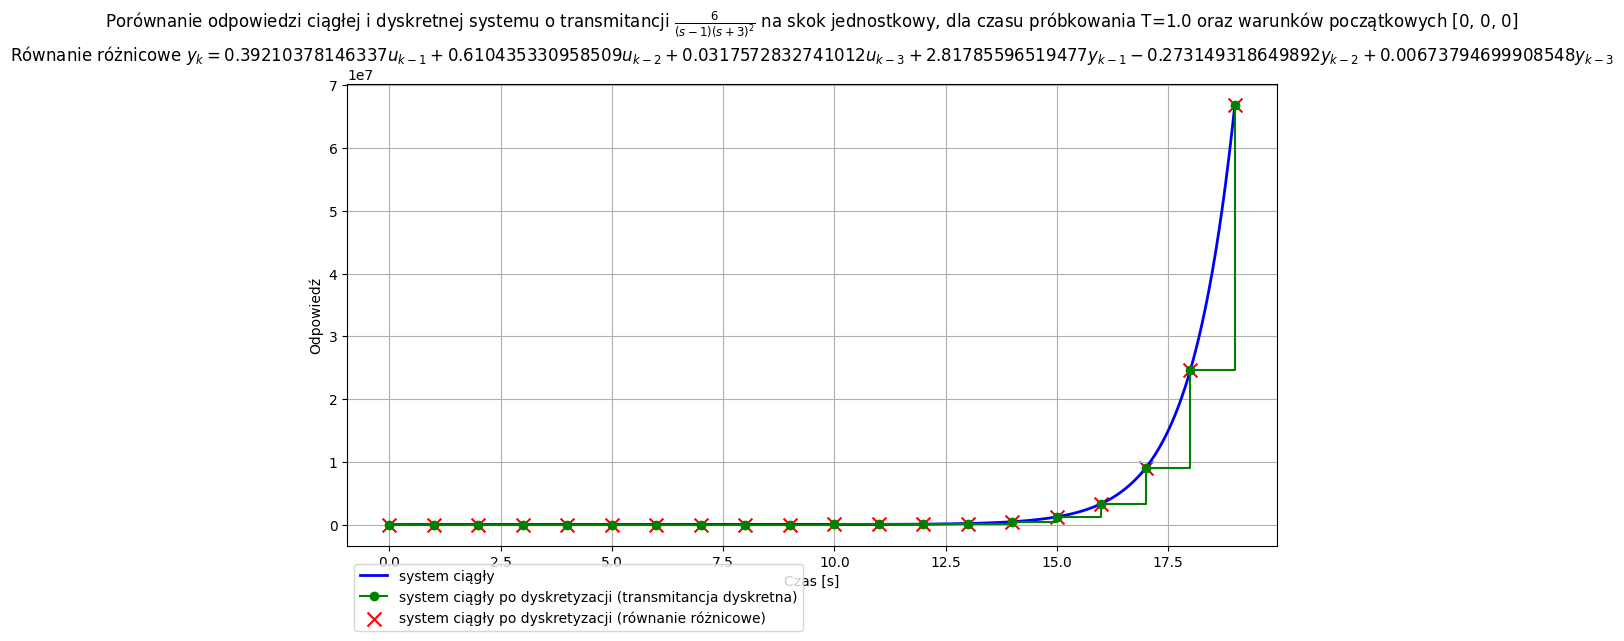

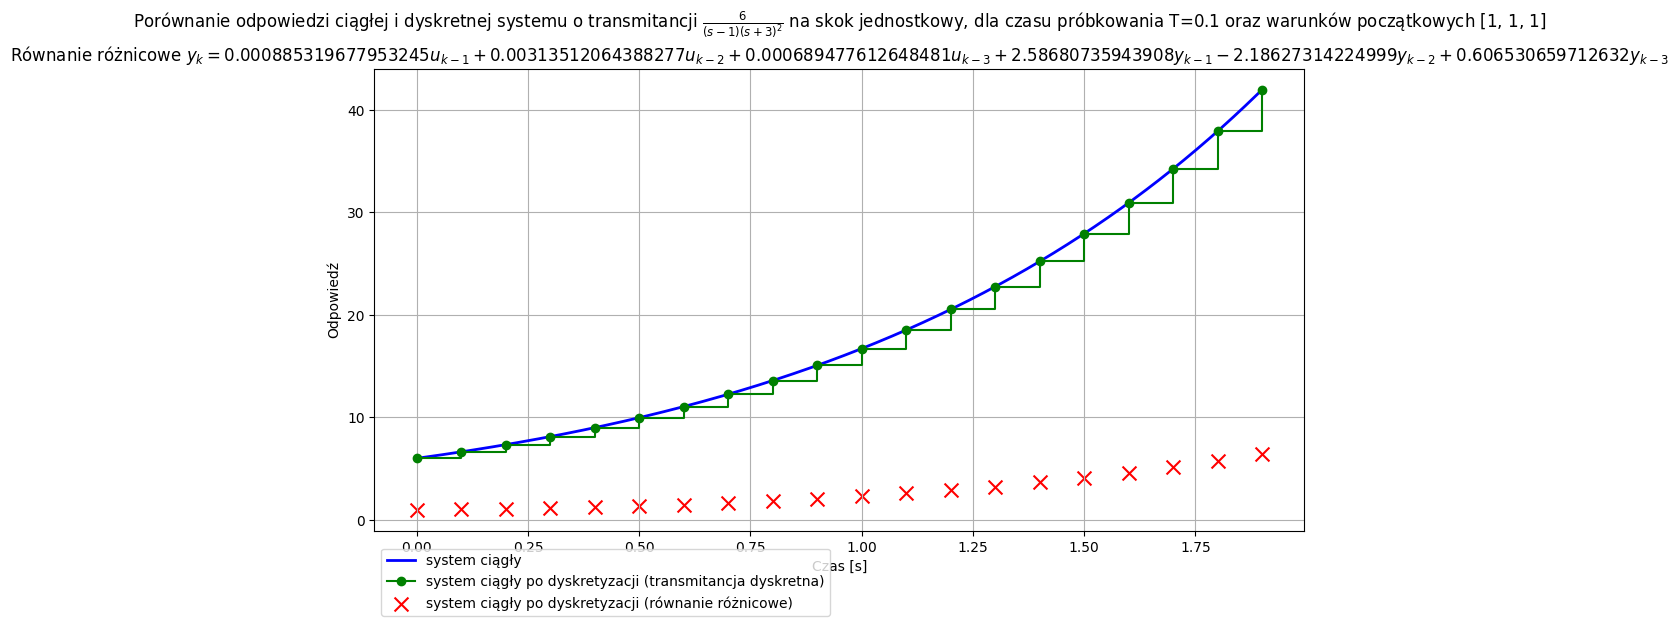

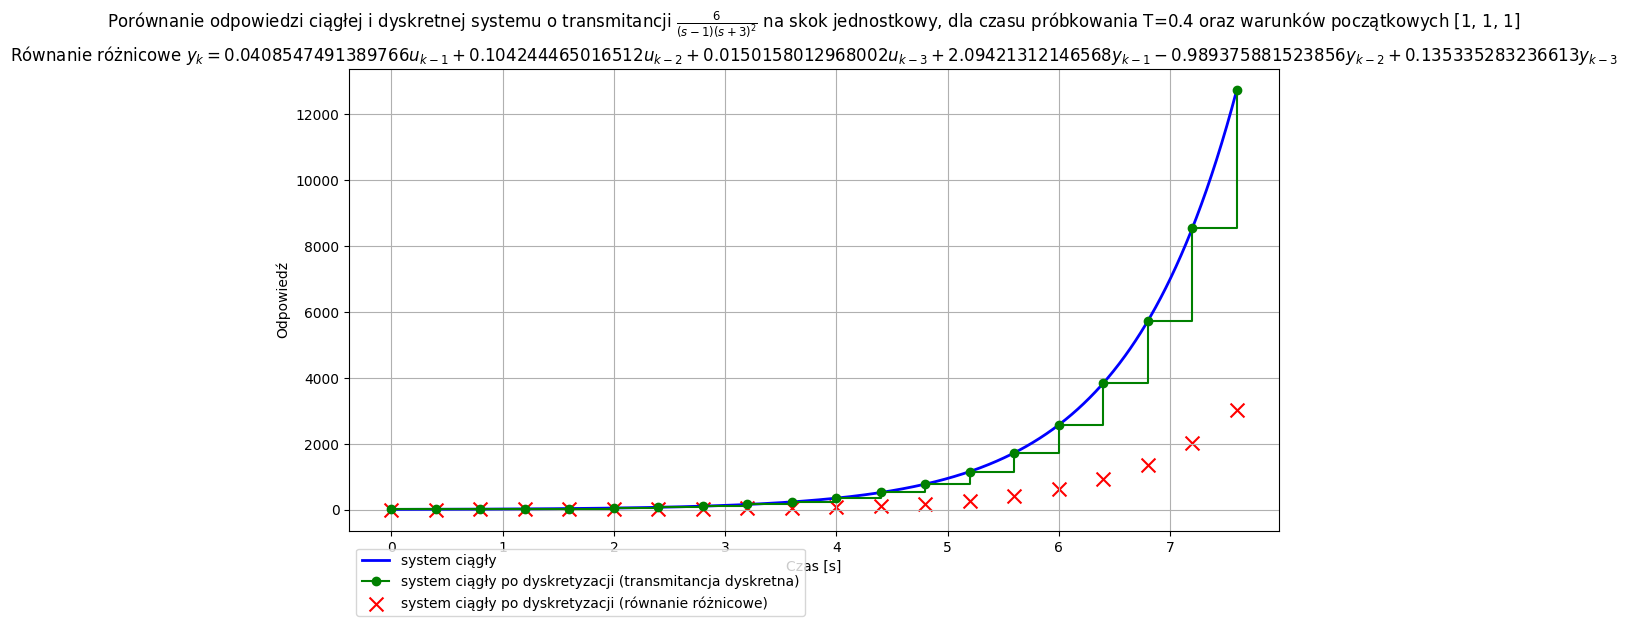

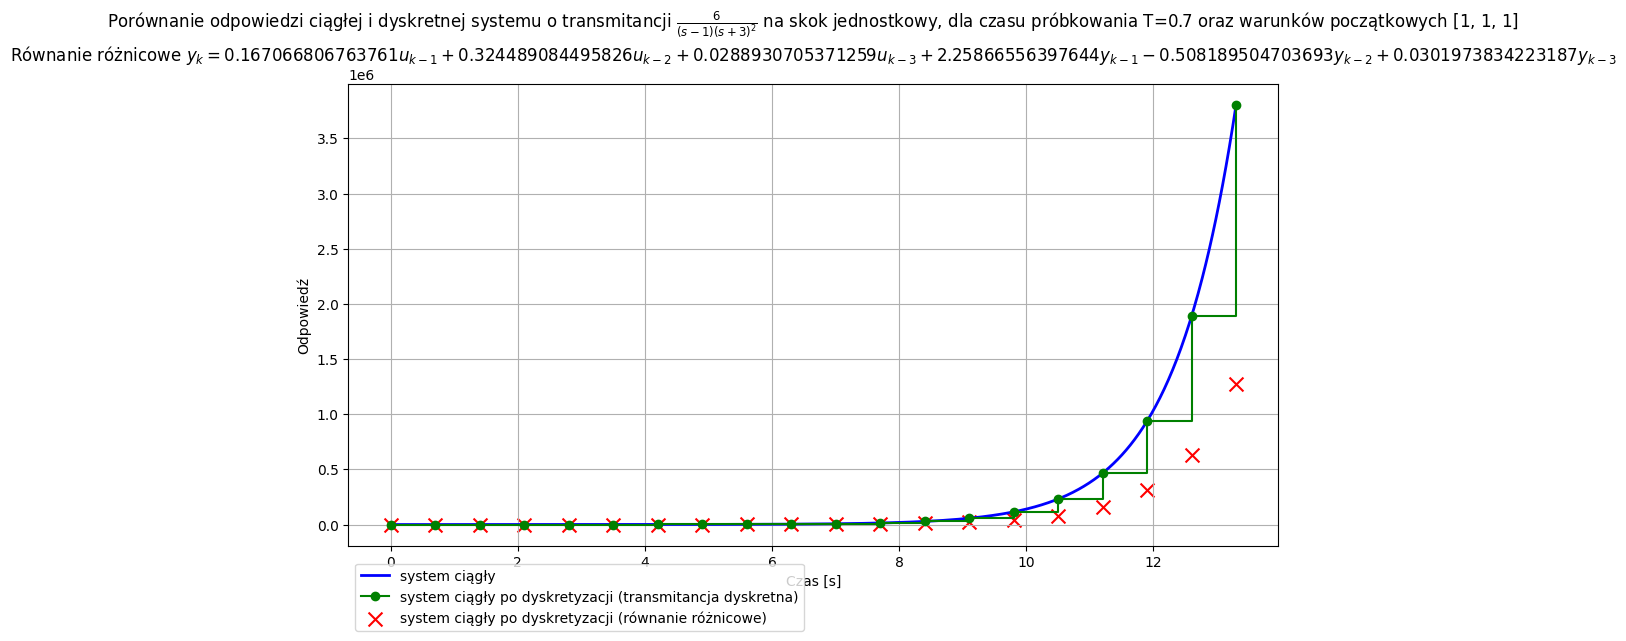

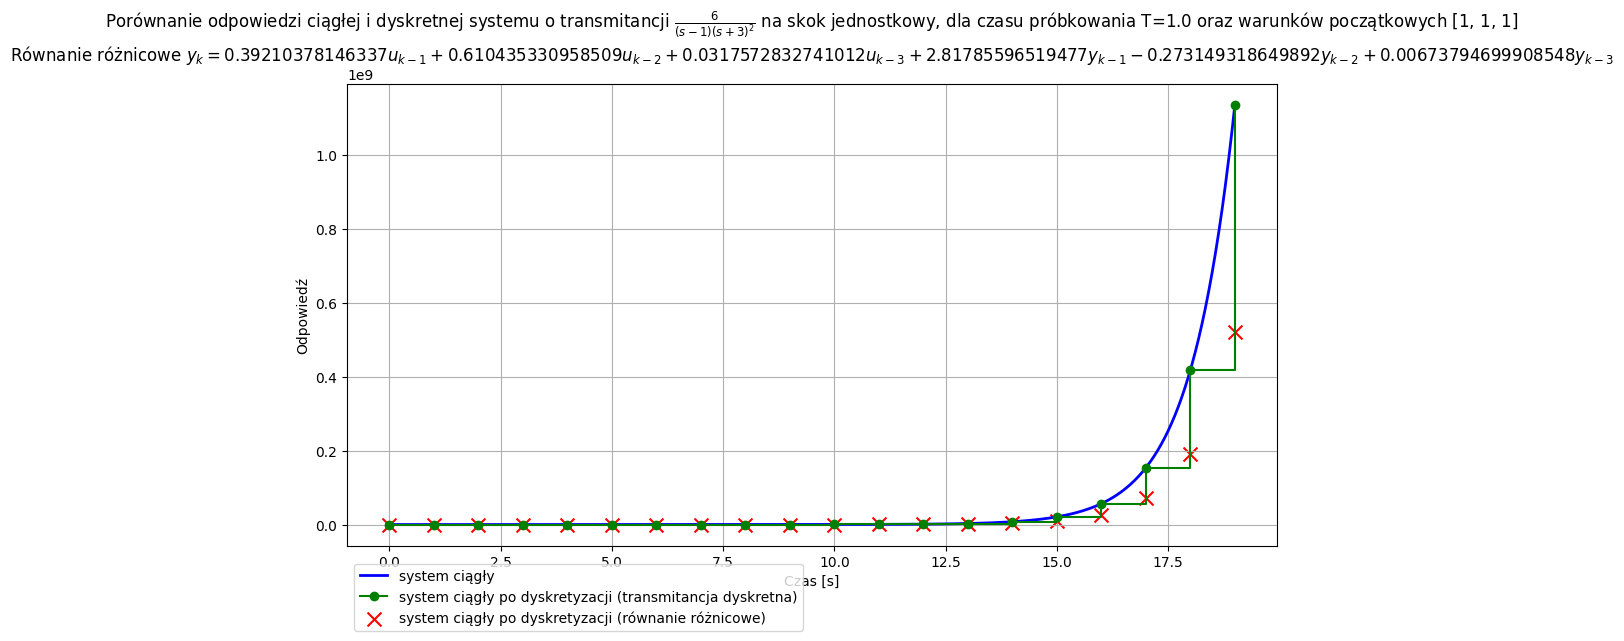

In [10]:
from sympy.abc import s
k = sp.symbols('k', integer=True)

G2_s = C/((s+A)*(s+B)*(s-1))

def compare_continuous_discrete(G_continuous_sympy, Ts: list, ics: list, u_signal: np.ndarray, u_alias: str, iterations: int):
    num = [float(c) for c in sp.Poly(sp.fraction(G_continuous_sympy)[0], s).all_coeffs()]
    den = [float(c) for c in sp.Poly(sp.fraction(G_continuous_sympy)[1], s).all_coeffs()]
    G_continuous_sys = ctrl.tf2ss(ctrl.TransferFunction(num, den))
    
    for T in Ts:
        t_continuous = np.linspace(0, (iterations-1) * T, 1000)
        y_continuous = ctrl.forced_response(G_continuous_sys, T=t_continuous, U=u_signal, X0=ics)[1]

        G_discrete_sys = ctrl.c2d(G_continuous_sys, T, method='zoh')
        t_discrete = np.arange(0, iterations) * T
        y_discrete = ctrl.forced_response(G_discrete_sys, T=t_discrete, U=u_signal[:iterations], X0=ics)[1]

        G_discrete = ctrl.ss2tf(G_discrete_sys)
        a = G_discrete.den[0][0]
        b = G_discrete.num[0][0]
        difference_eq = sp.Eq(
            y_k[k],
            -sum(a[i] * y_k[k - i] for i in range(1, len(a))) + sum(b[i] * u_k[k - i - 1] for i in range(len(b)))
        )

        y_difference = np.zeros(iterations)
        u_difference = u_signal[:iterations]
        for i in range(iterations):
            to_sub = {y_k[k + n]: y_difference[i + n] if i+n >= 0 else ics[-(i+n)-1] for n in range(-3, 0)}
            to_sub.update({u_k[k + n]: u_difference[i + n] if i+n >= 0 else 0 for n in range(-4, 0)})
            y_difference[i] = float(sp.solve(difference_eq, y_k[k])[0].subs(to_sub))

        plt.figure(figsize=(12, 6))
        plt.plot(t_continuous, y_continuous, 'b-', linewidth=2, label='system ciągły')
        plt.step(t_discrete, y_discrete, 'o-', color='green', where='post', label=f'system ciągły po dyskretyzacji (transmitancja dyskretna)')
        plt.scatter(t_discrete, y_difference, color='red', marker='x', s=100, label='system ciągły po dyskretyzacji (równanie różnicowe)')
        plt.xlabel('Czas [s]')
        plt.ylabel('Odpowiedź')
        plt.title(f'Porównanie odpowiedzi ciągłej i dyskretnej systemu o transmitancji ${sp.latex(G_continuous_sympy)}$ na {u_alias}, dla czasu próbkowania {T=} oraz warunków początkowych {ics}\nRównanie różnicowe ${sp.latex(difference_eq)}$')
        plt.legend()
        plt.legend(loc='lower left', bbox_to_anchor=(0, -0.2))
        plt.grid(True)
        plt.show()


compare_continuous_discrete(G2_s, Ts=[0.1, 0.4, 0.7, 1.0], ics=[0, 0, 0], u_signal=step_input(1000), u_alias="skok jednostkowy", iterations=20)
compare_continuous_discrete(G2_s, Ts=[0.1, 0.4, 0.7, 1.0], ics=[1, 1, 1], u_signal=step_input(1000), u_alias="skok jednostkowy", iterations=20)

### Wnioski
- Odpowiedź systemu dyskretnego wyznaczona metodą ZOH pokrywa się z odpowiedzią układu ciągłego przy odpowiednio dobranym czasie próbkowania i zerowych warunkach początkowych, co potwierdza poprawność dyskretyzacji (`ctrl.c2d(..., method='zoh')`).

- W pierwotnej wersji, równanie różnicowe wyznaczone z transmitancji dyskretnej generowało odpowiedź przesuniętą w czasie. Wynikało to z nieuwzględnienia opóźnienia w działaniu wejścia $u[k]$, charakterystycznego dla metody ZOH.

- Po uwzględnieniu tego opóźnienia poprzez przesunięcie indeksów wejścia o 1 wstecz (czyli stosując $u[k - i - 1]$ zamiast $u[k - i]$), odpowiedź z równania różnicowego zaczęła się pokrywać z odpowiedzią dyskretną oraz ciągłą, eliminując przesunięcie.

- Poprawione równanie różnicowe ma postać:
  $y[k] = -\sum_{i=1}^{n} a_i \cdot y[k - i] + \sum_{i=0}^{m} b_i \cdot u[k - i - 1]$
  i w pełni odzwierciedla dynamikę układu dyskretnego uzyskanego metodą ZOH.

- Transmitancja dyskretna nadal zakłada zerowe warunki początkowe, dlatego dla niezerowych stanów początkowych odpowiedź wyznaczona z równania różnicowego nie jest zgodna z rzeczywistą dynamiką systemu.

- Aby uwzględnić warunki początkowe w odpowiedzi dyskretnej, konieczne jest użycie reprezentacji w przestrzeni stanów.

- Inne metody dyskretyzacji (np. `'tustin'`, `'foh'`) mogą zmieniać sposób oddziaływania wejścia na wyjście, ale także wprowadzają inne uproszczenia lub przybliżenia i niekoniecznie oddają dokładnie dynamikę oryginalnego układu.



## Zadanie 3

<div style="text-align:center;"><img src="./discrete_pid_flow.png" alt="Discrete PID system diagram"></div>


#### Opis elementów diagramu:
- $\mathbf{\Sigma}$ - Sumator/element różnicowy, porównuje wartość zadaną ze spróbkowaną wartością wyjściową i zwraca różnicę (uchyb),
- **PID** - Dyskretny regulator PID,
- **DAC** - Przetwornik cyfrowo-analogowy tworzący z dyskretnego wyjścia regulatora ciągły sygnał sterujący obiektem rzeczywistym,
- **Obiekt** - Rzeczywisty obiekt przyjmujący sterowanie oraz generujący wyście w czasie ciągłym,
- **Czujnik** - Element odczytujący wyście obiektu i przetwarzający je na analogowy sygnał elektryczny
- **ADC** - Przetwornik analogowo-cyfrowy próbkujący wyjście obiektu odczytane przez czujnik aby przejść w dziedzinę czasu dyskretnego


$$
G_1(s)=\frac{C}{(s+A)(s+B)(s-1)}=\frac{C}{s^3+(A+B-1)s^2+(AB-A-B)s-AB}
$$

### Konfiguracja "regulator dyskretny i system ciągły"

In [11]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

A = 3
B = 3
C = A + B

def r(k):
    return 10 * (k >= 10)

def pi_controller(Kp, Ki, ts):
    e_sum = 0

    def pi_controller_response(e_k):
        nonlocal e_sum
        e_sum += e_k * ts
        return Kp * e_k + Ki * e_sum

    return pi_controller_response

G1 = ctrl.tf([C], [1, A + B - 1, A*B - A - B, -A*B])

def simulate_g1_continous(Kp, Ki, ts, t_max=200):
    k_vals = np.arange(9, t_max, ts)
    N = len(k_vals)
    y = np.zeros(N)
    u = np.zeros(N)

    controller = pi_controller(Kp, Ki, ts)

    for i in range(N - 1):
        k = k_vals[i]
        u[i] = controller(r(k) - y[i])

        t_lin = np.linspace(0, ts, 100)
        u_lin = u[i] * np.ones_like(t_lin)
        _, y_segment = ctrl.forced_response(G1, T=t_lin, U=u_lin, X0=0)


        y[i + 1] = y_segment[-1]

    return (k_vals, y, u)

def plot_simulation_results(sim_out, ts, t_max, plot_title):
    k_vals, y, u = sim_out
    plt.figure(figsize=(12, 5))
    plt.suptitle(plot_title, fontsize=16)

    plt.subplot(1, 2, 1)
    plt.plot(k_vals, y, label='Wyjście y(k)')
    plt.plot([9,9.999,10,t_max], r(np.array([9,9.999,10,t_max])), 'k--', label='Sygnał referencyjny r(k)')
    plt.xlabel('Czas [s]')
    plt.ylabel('Wyjście układu')
    plt.title('Odpowiedź układu')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(k_vals, u, 'r', label='Sterowanie u(k)')
    plt.xlabel('Czas [s]')
    plt.ylabel('Sygnał sterujący')
    plt.title('Sygnał sterujący regulatora PI')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

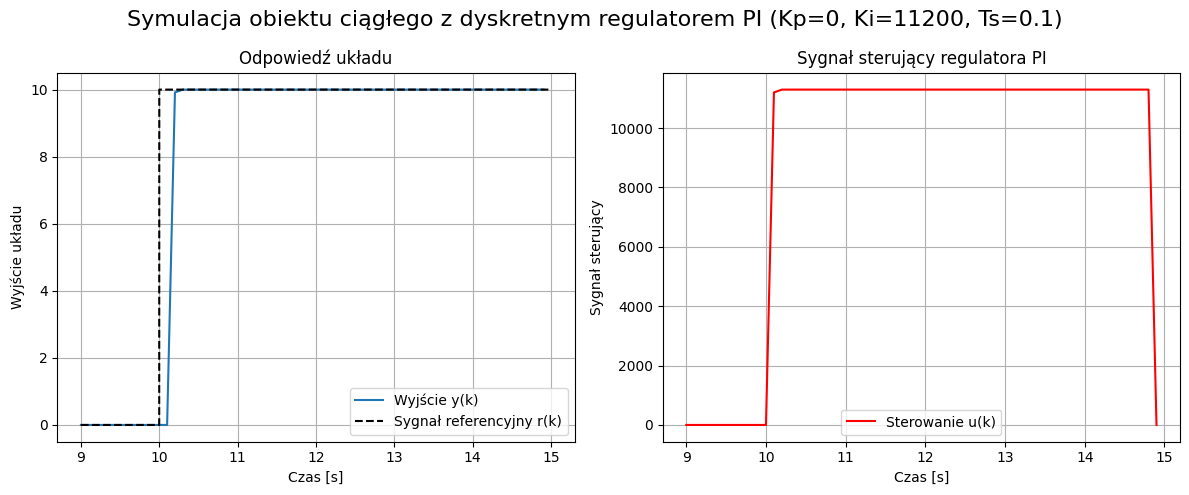

In [12]:
ts = 0.1
kp = 0
ki = 11200
t_max = 15

sim_out = simulate_g1_continous(kp, ki, ts, t_max)
plot_simulation_results(sim_out, ts, t_max, f'Symulacja obiektu ciągłego z dyskretnym regulatorem PI (Kp={kp}, Ki={ki}, Ts={ts})')

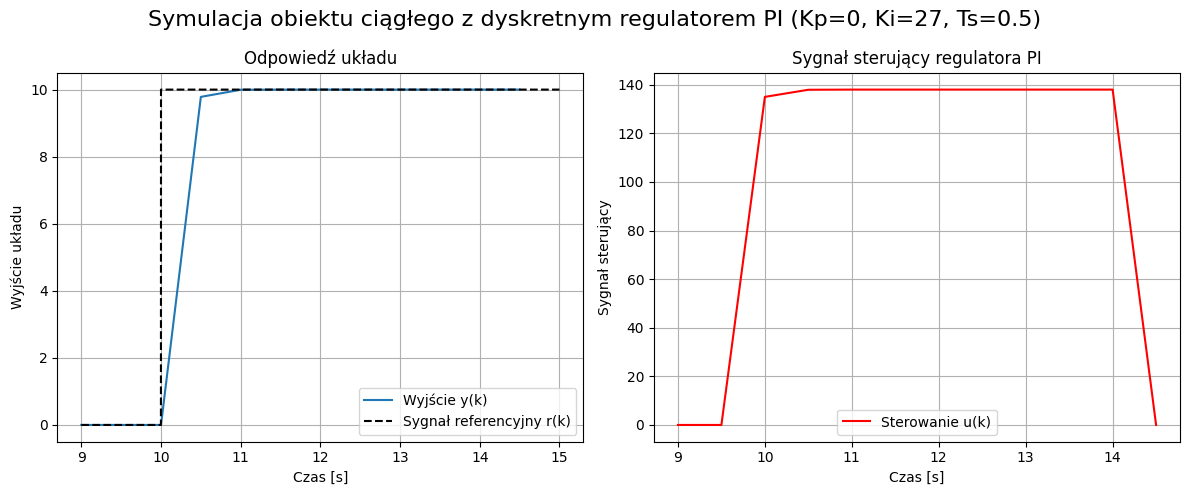

In [13]:
ts = 0.5
kp = 0
ki = 27
t_max = 15

sim_out = simulate_g1_continous(kp, ki, ts, t_max)
plot_simulation_results(sim_out, ts, t_max, f'Symulacja obiektu ciągłego z dyskretnym regulatorem PI (Kp={kp}, Ki={ki}, Ts={ts})')

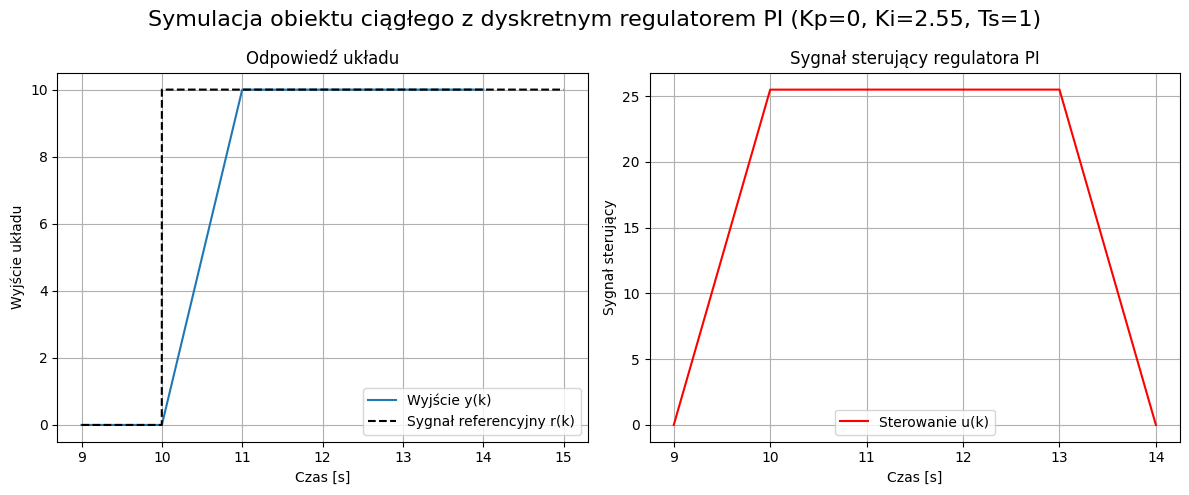

In [14]:
ts = 1
kp = 0
ki = 2.55
t_max = 15

sim_out = simulate_g1_continous(kp, ki, ts, t_max)
plot_simulation_results(sim_out, ts, t_max, f'Symulacja obiektu ciągłego z dyskretnym regulatorem PI (Kp={kp}, Ki={ki}, Ts={ts})')

### Konfiguracja "regulator dyskretny i system dyskretny"

In [15]:
def simulate_g1_discrete(Kp, Ki, ts, t_max=100):
    G1d = ctrl.sample_system(G1, ts, method='zoh')
    G1_ss = ctrl.tf2ss(G1d)
    A_d, B_d, C_d, D_d = G1_ss.A, G1_ss.B, G1_ss.C, G1_ss.D

    k_vals = np.arange(9, t_max + ts, ts)
    N = len(k_vals)
    y = np.zeros(N)
    u = np.zeros(N)
    e = np.zeros(N)
    x = np.zeros(A_d.shape[0])

    controller = pi_controller(Kp, Ki, ts)

    for i in range(N - 1):
        e[i] = r(k_vals[i]) - y[i]
        u[i] = controller(e[i])
        x = A_d @ x + B_d.flatten() * u[i]
        y[i + 1] = (C_d @ x).item() + D_d.item() * u[i]

    e[-1] = r(k_vals[-1]) - y[-1]
    u[-1] = controller(e[-1])

    return k_vals, y, u


Moduły biegunów G1d: [1.10517092 0.74081822 0.74081822]


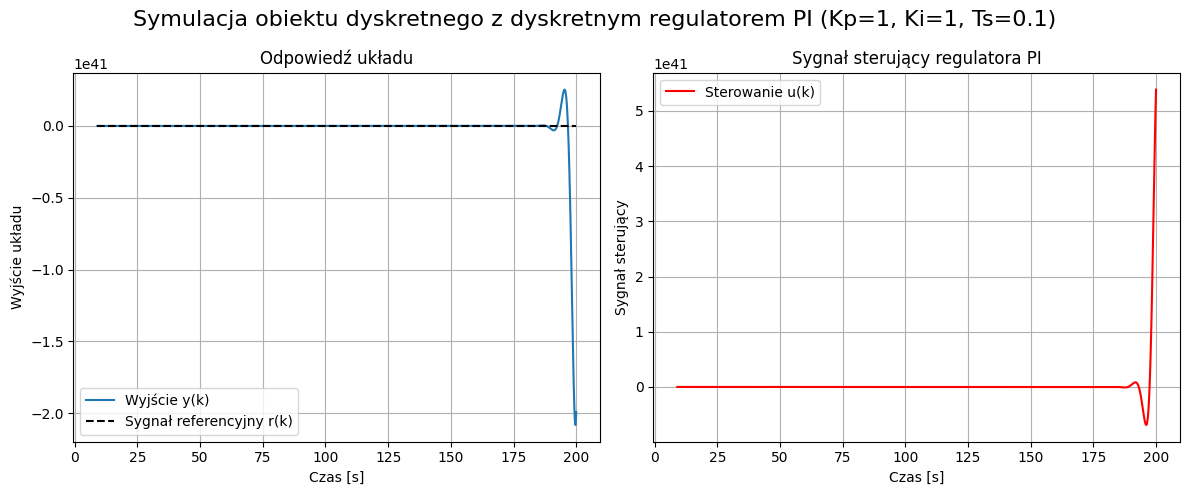

In [16]:
kp = 1
ki = 1
ts = 0.1
t_max = 200

G1d = ctrl.sample_system(G1, ts, method='zoh')
print("Moduły biegunów G1d:", np.abs(ctrl.poles(G1d)))
k_vals, y, u = simulate_g1_discrete(kp, ki, ts, t_max)
plot_simulation_results((k_vals, y, u), ts, t_max, f'Symulacja obiektu dyskretnego z dyskretnym regulatorem PI (Kp={kp}, Ki={ki}, Ts={ts})')


### Wnioski:
- Dla konfiguracji "regulator dyskretny i system ciągły" udało się pomyślnie dobrać nastawy regulatora dyskretnego $PI$ tak aby osiągnąć stabilność, stłumić oscylacje i nawet osiągnąć wartość oczekiwaną w stosunkowo krótkim czasie. Eksperymentalnie wyznaczone nastawy:
  - **Ts = 0.1s** : *Kp = 0 , Ki = 11200*
  - **Ts = 0.5s** : *Kp = 0 , Ki = 27*
  - **Ts = 1s** : *Kp = 0 , Ki = 2.55*
- Wprowadzenie nawet najmniejszej wartości *Kp* powodowało pojawianie się oscylacji w momencie zbliżania się do wartości zadanej. *Ki* zostało dobrane tak aby jaknajszybciej osiągnąć *r(k)*, jednocześnie eliminując oscylacje w okolicach pobudzenia k=10.
- W konfiguracji "regulator dyskretny i system dyskretny" nie udało się osiągnąć stabliności niezależnie od nastaw regulatora $PI$ i okresu próbkowania $Ts$. Możliwe przyczyny:
  - Obiekt po dyskretyzacji posiada 1 biegun niestabliny (1.01005017 > 1), a dwa pozostałe są bardzo blisko granicy stabliności (0.97044553, 0.97044553). W teorii stabilizacja dyskretnym regulatorem $PI$ powinna być możliwa, jednak czułość obiektu na najmniejszą różnicę w nastawach powoduje że eksperymentalnie jest to bliskie niemożliwemu.
  - Obiekt ma naturalną tendencję do gwałtownych oscylacji, a w szczególności człon $I$ potęguje tą charakterystykę.



### Analityczna analiza stabliności zdyskretyzowanego systemu $G1(s)$ z wykorzystaniem kryterium Jurry'ego
#### Dla dyskretnej transmitancji $G1(z)$ wyznaczonej w zadaniu 1:
$$
G_1(z)=-\frac{3Tze^{3T}}{2(ze^{3T}-1)^2}-\frac{3ze^{3T}}{8(ze^{3T}-1)}+\frac{3z}{8(z-e^T)}
$$
Wielomian standardowy $P(z)$ (czynniki mianowników) ma postać :
$$
P(z)=(ze^{3T})^2(z-e^T)=z^3e^{6T}-z^2(e^{7T}+2e^{3T})+z(2e^{4T}+1)-e^T
$$
Wyciągnięcie współczynników do wykorzystania w kryterium:
$$
P(z)=a_0z^3+a_1z^2+a_2z+a_3 \\
\begin{cases}
a_0=e^{6T} \\
a_1=-(e^{7T}+2e^{3T})=-e^{3T}(e^{4T+2}) \\
a_2=2e^{4T}+1 \\
a_3=-e^T
\end{cases}
$$
Warunki Jurry'ego dla stabilności układu:
$$
\begin{cases}
1.\quad |a_3| < a_0 \\
2.\quad |a_0a_2-a_3a_1| < a_0a_3 \\
3.\quad |a_1a_2-a_0a_3| < a_0^2a_3^2 \\
4.\quad a_0 > 0 , a_3 > 0
\end{cases}
$$
Interesujący wynik daje punkt 4. kryterium:
$$
\begin{cases}
a_0=e^{6T} > 0 \quad\forall \: T \qquad OK \\
A_3=-e^T < 0 \quad\forall \: T \quad ! NIESTABILNY !
\end{cases}
$$

### Wnioski:
- Układ o dyskretnej transmitancji $G1(z)$ jest niestabilny na podstawie kryterium Jurry'ego.
- Wynik ten jest zgodny z analizą biegunów wyznaczonych automatycznie w poprzednim podpunkcie.

### Implementacja automatycznej analizy stabilności systemu dyskretnego z wykorzystaniem kryterium Jurry-ego

In [17]:
import sympy as sp
from sympy.abc import s, z
Ts = sp.symbols('Ts')
import numpy as np

def discretize_G1(Ts_val):
    G1 = 6 / ((s + 3)**2 * (s - 1))
    s_to_z = (2/Ts) * (z - 1) / (z + 1)
    Gz = G1.subs(s, s_to_z)
    Gz = sp.simplify(Gz)

    num, den = sp.fraction(Gz)
    num = sp.expand(num)
    den = sp.expand(den)
    char_poly = sp.expand(den + num)
    char_poly_num = char_poly.evalf(subs={Ts: Ts_val})

    char_poly_poly = sp.Poly(char_poly_num, z)
    coeffs = char_poly_poly.all_coeffs()
    coeffs = [float(c) for c in coeffs]

    return Gz.evalf(subs={Ts: Ts_val}), coeffs

def jury_stability(coeffs):
    a = coeffs[:]
    n = len(a) - 1

    # Warunek 1: |a[n]| < |a[0]|
    if abs(a[-1]) >= abs(a[0]):
        print("Warunek 1 nie spełniony: |a[n]| >= |a[0]|")
        return False

    # Warunek 2: suma wszystkich współczynników > 0
    if sum(a) <= 0:
        print("Warunek 2 nie spełniony: suma współczynników <= 0")
        return False

    # Warunek 3: naprzemienna suma współczynników > 0
    alt_sum = sum([(-1)**i * a[i] for i in range(n+1)])
    if alt_sum <= 0:
        print("Warunek 3 nie spełniony: naprzemienna suma <= 0")
        return False

    # Iteracyjne sprawdzanie Jury’ego
    def build_next_row(row):
        a0 = row[0]
        an = row[-1]
        next_row = []
        for i in range(len(row)-1):
            val = row[i] - (an/a0) * row[-i-1]
            next_row.append(val)
        return next_row

    current_row = a
    for step in range(n - 1):
        if current_row[0] == 0:
            print(f"Przerwano: pierwszy element wiersza {step} równy zero.")
            return False
        current_row = build_next_row(current_row)
        current_row = [float(x) for x in current_row]
        current_row = [x / current_row[0] for x in current_row]
        if len(current_row) == 1:
            break
        if any(np.isnan(current_row)) or any(np.isinf(current_row)):
            print("Pojawiły się NaNy lub infy – niestabilny lub źle sformułowany wielomian.")
            return False

    return True


def check_stability_roots(coeffs):
    roots = np.roots(coeffs)
    print("Moduły pierwiastków wielomianu charakterystycznego:")
    for r in roots:
        print(f"{abs(r):.6f}")
    stable = all(abs(r) < 1 for r in roots)
    print("Stabilny (wszystkie pierwiastki w jednostkowym kole):", stable)

Ts_example = 0.001
Gz_discrete, char_poly_coeffs = discretize_G1(Ts_example)
print(f"Dyskretna transmitancja G(z) dla Ts={Ts_example}:")
print(Gz_discrete)
print("\nWspółczynniki wielomianu charakterystycznego P(z):")
print(char_poly_coeffs)

print("\nTest Jurry'ego:")
print("Stabilność wg Jurry'ego:", jury_stability(char_poly_coeffs))

print("\nTest pierwiastków wielomianu:")
check_stability_roots(char_poly_coeffs)


Dyskretna transmitancja G(z) dla Ts=0.001:
-6.0e-9*(z + 1.0)**3/((2.001 - 1.999*z)*(2.003*z - 1.997)**2)

Współczynniki wielomianu charakterystycznego P(z):
[-8.020005997, 24.019994009, -23.979993991, 7.980006003000001]

Test Jurry'ego:
Warunek 3 nie spełniony: naprzemienna suma <= 0
Stabilność wg Jurry'ego: False

Test pierwiastków wielomianu:
Moduły pierwiastków wielomianu charakterystycznego:
1.000514
0.998573
0.995922
Stabilny (wszystkie pierwiastki w jednostkowym kole): False


### Wnioski:
- Automatycznie przeprowadzone kryterium Jurry'ego stwierdza że układ o dyskretnej transmitancji $G1(z)$ jest niestabilny.
- Automatycznie uzyskany wynik kryterium jest zgodny z wynikiem uzyskanym ręcznie.
- Wynik ten jest zgodny z analizą biegunów wyznaczonych automatycznie.